<a href="https://www.kaggle.com/code/abdelazizelsawy/no-show-appointments?scriptVersionId=100666591" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border: 1px  LightSteelBlue solid !important;
  color: darkblue
 !important;}


# Project: No-show appointments - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>

<li><a href="#intro">Introduction</a></li>
<li><a href="#Quest">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **:This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row**.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

<a id='Quest'></a>

## Questions



### Question(s) for Analysis


>****: Clearly state one or more questions that we plan on exploring over the course of the report. we will address these questions in the **data analysis**
>****: Once we start coding, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, ** use good coding practices**, such as, define and use functions to avoid repetitive code. We'll se appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

>**: As we mentioned, our main goal is to find out the main reason that drives patients to attend or not to attend, and we will look into the matter through eight axes**.

>: 1- age

>: 2- sex

>: 3- Get scholarships

>: 4- Get a text message

>: 5- Diabetes

>: 6- Hypertension disease

>: 7- Alcohol addiction

>: 8- Residential location

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties
> We will start by reading our data set, explore it with some statistical functions to make an overview to make sure we ask the right questions and make our data ready for the analysis process.

In [3]:
df = pd.read_csv('../input/d/datasets/joniarroba/noshowappointments/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**no-show and Hipertension will be renamed and all the coulmn names will be lowered**


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**there is no missing value in this data and there is a mistake in the age column '-1'**

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#all the coulmns lowercases
df.columns= df.columns.str.strip().str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.rename(columns={'no-show':'no_show'},inplace=True)

In [9]:
df.rename(columns={'hipertension':'hypertension'},inplace=True)

In [10]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#how many patients we r dealing with
df['patientid'].duplicated().sum()

48228

**every patient has more than one appointment**

In [12]:
#to find out id every patient has a unique show
df.duplicated(['patientid','no_show']).sum()

38710

**the same status for the patient in the same case**

In [13]:
# here to find if a patient received an sms
df.duplicated(['patientid','sms_received']).sum()

36043

**there is somthing between the SMSes and the patient**

In [14]:
#i want to know if thier is a relation between the show or no show and receiving an sms
df.duplicated(['no_show','sms_received']).sum()

110523

**every one receved but not every one came >> will we need th check the sms content?**

In [15]:
#check the data desctibtion one more time
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


In [16]:
#check the wrong value in the age column
miss_age = df.query("age == -1")
miss_age

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
df.drop(index= 99832, inplace= True)

**It's one row so I deleted it, next we remove the columns with the same patients showing statues only for the patients with the same statues not the unique**

In [18]:
df.drop_duplicates(['patientid','no_show'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patientid       71816 non-null  float64
 1   appointmentid   71816 non-null  int64  
 2   gender          71816 non-null  object 
 3   scheduledday    71816 non-null  object 
 4   appointmentday  71816 non-null  object 
 5   age             71816 non-null  int64  
 6   neighbourhood   71816 non-null  object 
 7   scholarship     71816 non-null  int64  
 8   hypertension    71816 non-null  int64  
 9   diabetes        71816 non-null  int64  
 10  alcoholism      71816 non-null  int64  
 11  handcap         71816 non-null  int64  
 12  sms_received    71816 non-null  int64  
 13  no_show         71816 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


**all the patients now has  unique showing values**

In [19]:
#exploring the shape of my data
df.shape

(71816, 14)

In [20]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**One more deep looking at the gender and neighbourhood**

In [21]:
df[["no_show","gender","neighbourhood"]].describe()

,no_show,gender,neighbourhood
count,71816,71816,71816
unique,2,2,81
top,No,F,JARDIM CAMBURI
freq,54153,46466,4800


In [22]:
#time to remove the data we wont use in our analysis
df.drop(['patientid','scheduledday','appointmentday','appointmentid'],axis=1, inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**now lets view our data**
>>
**It`s ready**


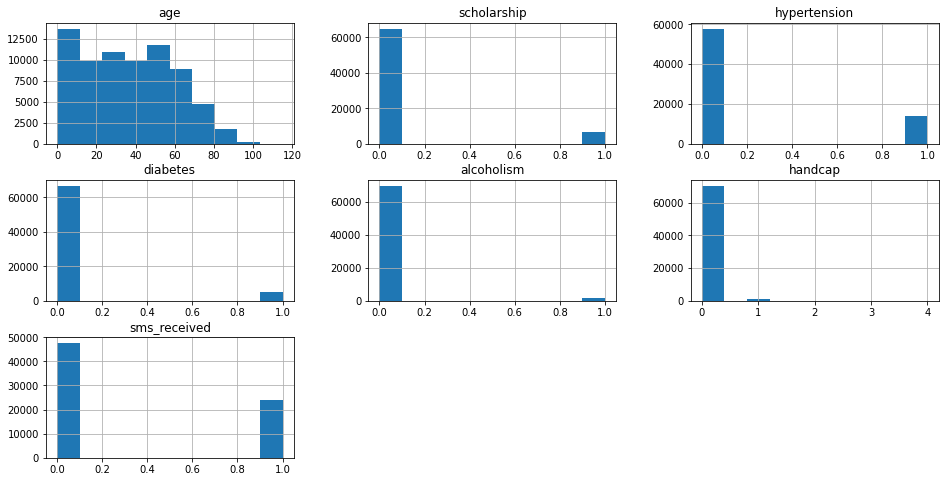

In [23]:
#data overView
df.hist(figsize=(16,8));

**Let's separate the date to two groups of patients >> show and no show**

In [24]:

show_p= df.no_show =='No'
noshow_p = df.no_show =='Yes'
df['no_show'].value_counts()

No     54153
Yes    17663
Name: no_show, dtype: int64

**It's 54153 for show patients and 17663 for no show patients , 3 times less than the show patiens**

In [25]:
print("The mean age for who shown is {} years old and, for who didn't is {} years old".format(round(df[show_p].age.mean(),0),round(df[noshow_p].age.mean(),0))) 

The mean age for who shown is 37.0 years old and, for who didn't is 34.0 years old


**Now we seprate the data one more time to Male and Female**

In [26]:
male_p = df.gender =='M'
female_p = df.gender =='F'
df['gender'].value_counts()

F    46466
M    25350
Name: gender, dtype: int64

In [27]:
print("The mean age for Male patients is {} years old and, for female patients is {} years old".format(round(df[male_p].age.mean(),0),round(df[female_p].age.mean(),0))) 

The mean age for Male patients is 33.0 years old and, for female patients is 38.0 years old


the female petients in the middle age is more than male patients

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the relation between show and no show!)

Let's see the Correlation between the shown people and who didnt

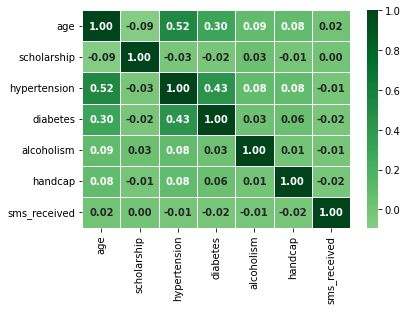

In [28]:
#HEATMAP FOR THE ALL DATAFRAME
sns.heatmap(df.corr(),cmap='Greens',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=1,center=0);

**In general there is a weak corrilation between elements, let's see the show and no show data frames  .**

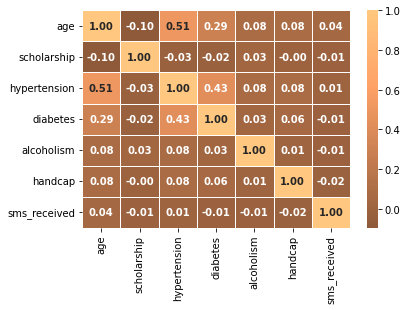

In [29]:
#Heatmap for show ppl
sns.heatmap(df[show_p].corr(),cmap='copper',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=1,center=0);

**There is some corrilations between hypertensin and age , hypertensin and diabetes and Sms in a very bad spot.**

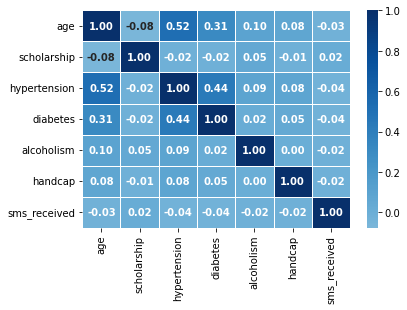

In [30]:
#Heatmap for noshow ppl
sns.heatmap(df[noshow_p].corr(),cmap='Blues',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=1,center=0);

**There same status for the show dataframe it's really hard to decide from here.**

Text(0.5, 1.0, 'Scholarship vs No-show')

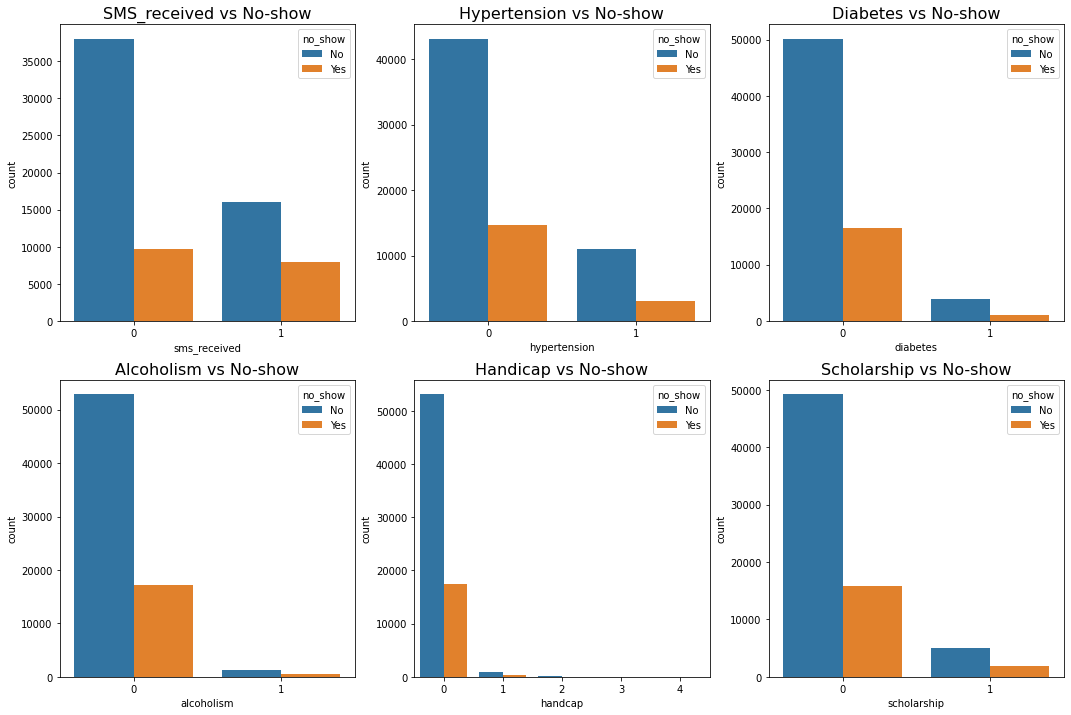

In [31]:
#let's make another count plot for the data
f,ax=plt.subplots(2,3,figsize=(18,12))
sns.countplot(x='sms_received', data=df, hue='no_show', ax=ax[0,0]);
ax[0,0].set_title('SMS_received vs No-show',fontsize=16)

sns.countplot(x='hypertension', data=df, hue='no_show', ax=ax[0,1]);
ax[0,1].set_title('Hypertension vs No-show',fontsize=16)

sns.countplot(x='diabetes', data=df, hue='no_show', ax=ax[0,2]);
ax[0,2].set_title('Diabetes vs No-show',fontsize=16)

sns.countplot(x='alcoholism', data=df, hue='no_show', ax=ax[1,0]);
ax[1,0].set_title('Alcoholism vs No-show',fontsize=16)

sns.countplot(x='handcap', data=df, hue='no_show', ax=ax[1,1]);
ax[1,1].set_title('Handicap vs No-show',fontsize=16)

sns.countplot(x='scholarship', data=df, hue='no_show', ax=ax[1,2]);
ax[1,2].set_title('Scholarship vs No-show',fontsize=16)

**We'll start with our two most important points Age and show .**

In [32]:
def attended(df,c_name):
    plt.figure(figsize=[20,6])
    df[c_name][show_p].hist(alpha=.5,bins=10,color= 'green',label='show_p')
    df[c_name][noshow_p].hist(alpha=1,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.xlim(0,120)
    plt.ylim(0,10000)
    plt.title(f'Patient and {c_name} compare')
    plt.xlabel('Age')
    plt.ylabel('Patient');

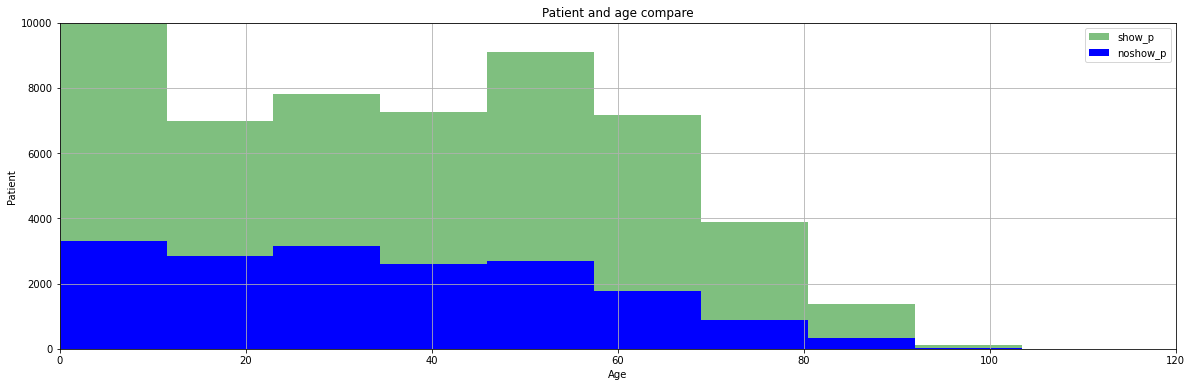

In [33]:
attended(df,'age')    

**alot of kids patients >> most between 0 and 10**

### Research Question 2  (does sex affect show or no show?)

Text(0.5, 1.0, 'Gender vs noshow on total count')

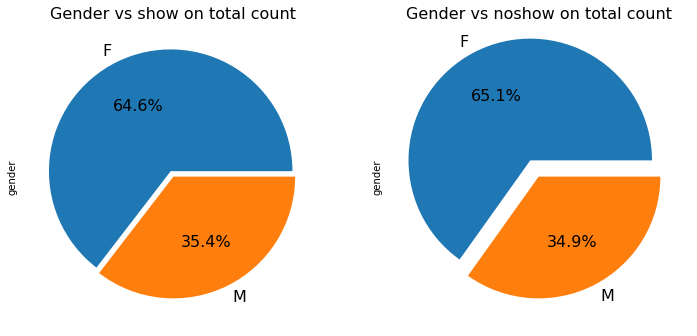

In [34]:
gender_show=df['gender'][show_p].value_counts()
gender_noshow=df['gender'][noshow_p].value_counts()
f,ax=plt.subplots(1,2,figsize=(12,6))
gender_show.plot.pie(ax=ax[0],explode=[0.05,0],autopct='%1.1f%%',fontsize= 16 )
ax[0].set_title('Gender vs show on total count',fontsize=16)
# Female vs Male on No-show
gender_noshow.plot.pie(ax=ax[1],explode=[0.15,0],autopct='%1.1f%%',fontsize= 16)
ax[1].set_title('Gender vs noshow on total count',fontsize=16 )

**In both cases, the attendance rate of females is greater than that of males in the same proportion, so there is no clear effect between attendance and gender .**

### Research Question 3  (does receiveing sms affect show or no show?)

In [35]:
#now let`s find out what's wrong with the sms
def sms_review(df,c_name ):
    plt.figure(figsize=[20,6])
    df[c_name][show_p].hist(alpha=.5,bins=10,color= 'black',label='show_p')
    df[c_name][noshow_p].hist(alpha=.5,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.title(f'Patient and {c_name} compare')
    plt.xlabel('Receiveing SMS')
    plt.ylabel('Patient');


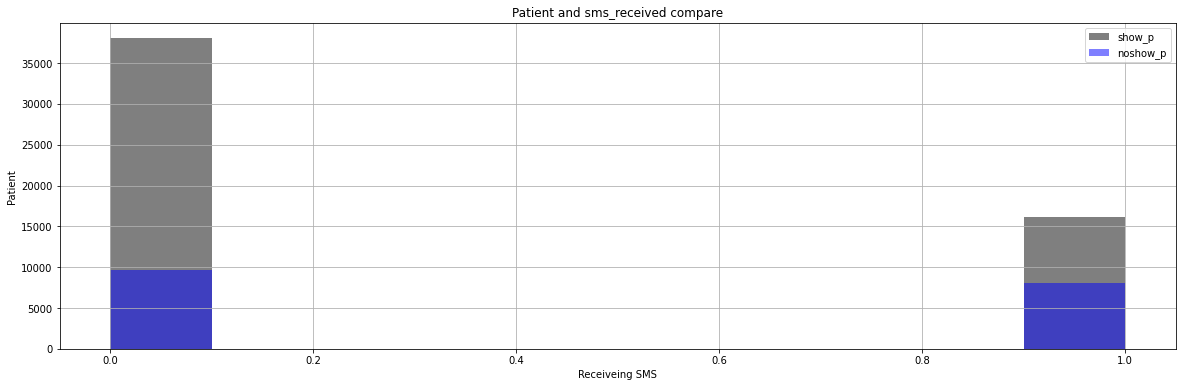

In [36]:
sms_review(df,'sms_received') 

**Most of the patients who came didnt receive sms .. we need to review the SMSes contnet and, we need to know if all patients receive the same sms .**


### Research Question 4  (does having scholarship affect show or no show?)

In [37]:
def attend_scholar(df,c_name ):
    plt.figure(figsize=[20,6])
    df[c_name][show_p].hist(alpha=.5,bins=10,color= 'red',label='show_p')
    df[c_name][noshow_p].hist(alpha=.5,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.title(f'Patient and {c_name} compare')
    plt.xlabel('Scholarship')
    plt.ylabel('Patient');

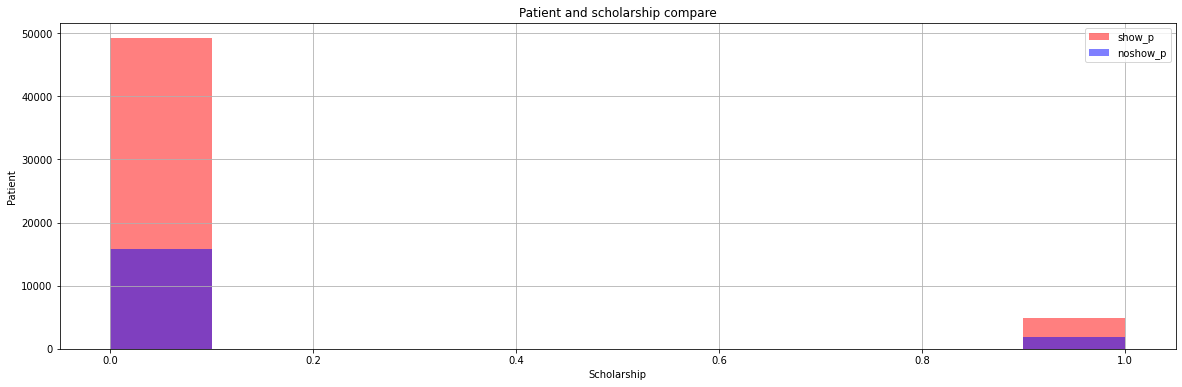

In [38]:
attend_scholar(df,'scholarship')  

**Most of the patients who came didnt had scholarships .. also this element doesn't effect the attendance .**


### Research Question 5  (does handcap affect show or no show?)

In [39]:
def attend_handcap(df,c_name ):
    plt.figure(figsize=[10,5])
    df[c_name][show_p].hist(alpha=.6,bins=10,color= 'red',label='show_p')
    df[c_name][noshow_p].hist(alpha=.5,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.title(f'Patient and {c_name} compare')
    plt.xlabel('Handcap')
    plt.ylabel('Patient');

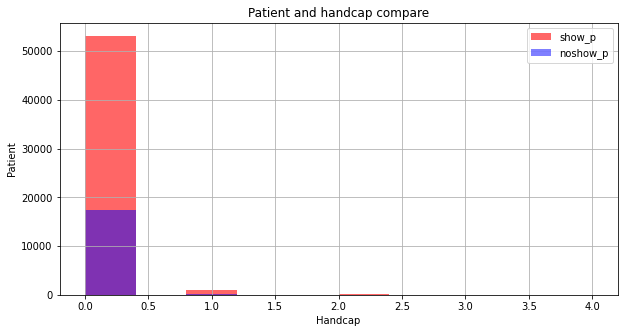

In [40]:
attend_handcap(df,'handcap') 

**There are four levels of handcap. Most patients have the first level of handcap .. that's for show and no-show !!.**

### Research Question 6  (does diabetes affect show or no show?)

In [41]:
def attend_diabetes(df,c_name ):
    plt.figure(figsize=[10,5])
    df[c_name][show_p].hist(alpha=.8,bins=10,color= 'brown',label='show_p')
    df[c_name][noshow_p].hist(alpha=.9,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.title(f'Patient with {c_name} attendance compare')
    plt.xlabel('Diabetes')
    plt.ylabel('Patient');

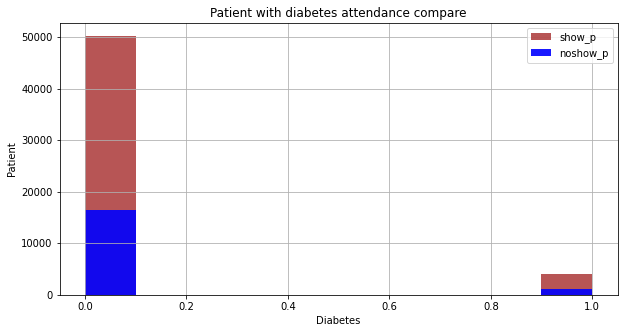

In [42]:
attend_diabetes(df,'diabetes') 

**Also the Diabetes doesn't affect the attendance!**

### Research Question 7  (does alcoholism affect show or no show?)

In [43]:
def attend_alcoholism(df,c_name ):
    plt.figure(figsize=[10,5])
    df[c_name][show_p].hist(alpha=.8,bins=10,color= 'brown',label='show_p')
    df[c_name][noshow_p].hist(alpha=.9,bins=10,color= 'blue',label='noshow_p')
    plt.legend();
    plt.title(f'Patient with {c_name} attendance compare')
    plt.xlabel('Alcoholism')
    plt.ylabel('Patient');

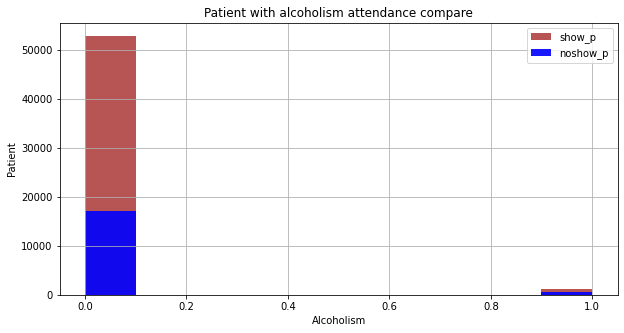

In [44]:
attend_alcoholism(df,'alcoholism') 

**Also the Alcoholism doesn't affect the attendance!**

### Research Question 8  (does Neighbourhood affect show or no show?)

In [45]:
print("The neighbourhood with the highest show patients is {} ".format(df[show_p]['neighbourhood'].value_counts()[:1]))
print("The neighbourhood with the lowest show patients is {} ".format(df[show_p]['neighbourhood'].value_counts()[-1:]))

The neighbourhood with the highest show patients is JARDIM CAMBURI    3666
Name: neighbourhood, dtype: int64 
The neighbourhood with the lowest show patients is PARQUE INDUSTRIAL    1
Name: neighbourhood, dtype: int64 


In [46]:
print("The neighbourhood with the highest noshow patients is {} ".format(df[noshow_p]['neighbourhood'].value_counts()[:1]))
print("The neighbourhood with the lowest noshow patients is {} ".format(df[noshow_p]['neighbourhood'].value_counts()[-1:]))


The neighbourhood with the highest noshow patients is JARDIM CAMBURI    1134
Name: neighbourhood, dtype: int64 
The neighbourhood with the lowest noshow patients is AEROPORTO    1
Name: neighbourhood, dtype: int64 


**The residents of Jardim Camburi region are the most frequent visitors to the medical center**

Text(0.5, 1.0, 'The relation between Neighbourhood and No-show')

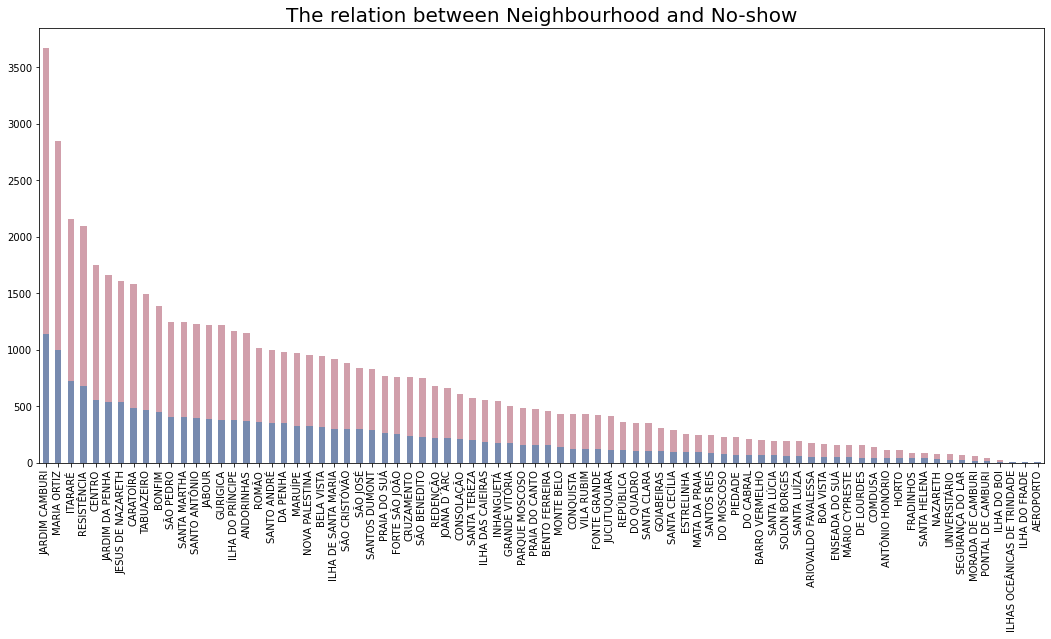

In [47]:
f,ax=plt.subplots(1,1,figsize=(18,8))
showup=df[show_p]['neighbourhood'].value_counts()
noshow= df[noshow_p]['neighbourhood'].value_counts()
(showup).plot(kind='bar',ax=ax,alpha=.5,color='#A54158')
(noshow).plot(kind='bar',ax=ax,alpha=.5,)
ax.set_title('The relation between Neighbourhood and No-show',fontsize=20)

In [48]:
df.head(0)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


<a id='conclusions'></a>
## Conclusions

finally, The data show that the presence of female patients is more than that of men with a noticeable difference
Also, the percentage of attendance from customers who did not receive messages is more than from those who received them

something else we need to takecare of is Jardim Camburi region most of our visitors came form there.

There are four levels of handcap.  Although Most patients have the first level of handcap, but this is not a big deal, life may contain some inconveniences, especially for patients .

After repeating the experience of messages again, the content can be judged, because it is the first time to send messages


It is also recommended to add some medical services for women and children, in order to take advantage of the percentage of the number of patients!
### Limitations
**most of the patients are female but there is no clear correlation between gender , age , hypertension , shcolarship , diabetes , alcoholism , handcap , sms_received and showing.**
